# DATA WRANGLING PROJECT

### WeRateDogs: Wrangling and Analyzing Twitter Archive

#### Flow of the Project
- Gather data 
- Assess data
- Clean data


In [1]:
import numpy as np
import pandas as pd
import json
import requests
import tweepy
import re

import matplotlib.pyplot as plt
import warnings
%matplotlib inline

In [2]:
import seaborn as sns
sns.set(style="darkgrid")

pd.options.display.max_rows
pd.options.display.max_columns
pd.set_option('display.max_colwidth', -1)

/home/saiprasad/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [3]:
from IPython.display import display

The above imported packages have been used throughout this notebook and all the packages are imported here itself.

Let's start by gathering all the necessary data.

### Gather Data

    1) twitter_archive: It is the WeRateDogs Twitter archive provided by Udacity and I have downloaded on local machine.
    2) image_predictions: It is the predictions of the tweets about what is breed of the dog using a neural network. It has been downloaded using a URL provided by Udacity using the request library.
    3) tweet_1 : using the twitter API and tweet ids, we have made a JSON file storing the tweets.

In [4]:
# let's start with getting the twitter-archive data using pandas' read_csv fn()

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [5]:
# let us now use the URL provided by Udacity to download the .tsv file using the requests library & into a pandas DF

url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)
    
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

In [6]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [7]:
# Assigning personal API keys, secrets, and token. They are missing in the final report due to privacy concerns.
consumer_key =''
consumer_secret =''
access_token =''
access_secret =''


In [8]:
# I have used youtube tutorials to generate this section of code.
# Use tweepy     

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit= True, wait_on_rate_limit_notify= True)

            


In [ ]:

# Generate the tweet_json.txt 
with open('tweet_json.txt', 'a', encoding='utf8') as f:
    for tweet_id in twitter_archive['tweet_id']:
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, f)
            f.write('\n')
        except:
            continue


Rate limit reached. Sleeping for: 467


In [9]:
# Putting each tweet in a list using a loop

tweet_data = []

tweet_file = open('tweet_json.txt', "r")

for line in tweet_file:
    try:
        tweet =json.loads(line)
        tweet_data.append(tweet)
    except:
        continue

tweet_file.close()


In [10]:
tweet_1 = pd.DataFrame()

# Now we will only add those columns in this DataFrame that are useful for the analysis.

tweet_1['id'] = list(map(lambda tweet: tweet['id'], tweet_data))
tweet_1['retweet_count'] = list(map(lambda tweet: tweet['retweet_count'], tweet_data))
tweet_1['favorite_count'] = list(map(lambda tweet: tweet['favorite_count'], tweet_data))

tweet_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945 entries, 0 to 3944
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              3945 non-null   int64
 1   retweet_count   3945 non-null   int64
 2   favorite_count  3945 non-null   int64
dtypes: int64(3)
memory usage: 92.6 KB


In [11]:
tweet_1.head()

,id,retweet_count,favorite_count
0,892420643555336193,7739,36368
1,892177421306343426,5730,31326
2,891815181378084864,3790,23609
3,891689557279858688,7904,39674
4,891327558926688256,8525,37877


### Assess Data

Now that we have gathered all the data required, we will move to assess data. We will start using the basic head(), tail(), info() and describe() to get basic idea about the data.

Thereafter, we will focus on 2 aspects, i.e. Data Quality and Tidy Data.  To go around the data quality issue, we will focus on Completeness, Validity, Accuracy, Consistency.

We will also try a more organized approach of data by data.


#### 1) twitter_archive

In [12]:
twitter_archive.head()  # to view the top 5 entries

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [13]:
twitter_archive.tail() # to view bottom 5 entries

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [14]:
twitter_archive.info()     #  to get information on the datatypes on each attribute


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
# Let us view some text from the tweets

twitter_archive['text'].head(5)

0    This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                     
1    This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV
2    This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                 
3    This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                           
4    This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f
Name: text, dtype: object

In [16]:
# checking for null values 

twitter_archive.isnull().sum()

tweet_id                      0   
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                     0   
source                        0   
text                          0   
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                 59  
rating_numerator              0   
rating_denominator            0   
name                          0   
doggo                         0   
floofer                       0   
pupper                        0   
puppo                         0   
dtype: int64

In [17]:
# for basic statistical idea about data

twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [18]:
# There are these columns like rating_denominator and rating_numerator where there can be a possibility of error
#  because the denominator is out of 10 and the max rating in any record can be 10 so any numbers out of that bracket
#  of 0-10 can be considered as either human errors / outliers / machine errors.

twitter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [19]:
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7       55 
14      54 
5       37 
6       32 
3       19 
4       17 
1       9  
2       9  
420     2  
0       2  
15      2  
75      2  
80      1  
20      1  
24      1  
26      1  
44      1  
50      1  
60      1  
165     1  
84      1  
88      1  
144     1  
182     1  
143     1  
666     1  
960     1  
1776    1  
17      1  
27      1  
45      1  
99      1  
121     1  
204     1  
Name: rating_numerator, dtype: int64

In [20]:
# let us also have a look at the kind of sources of the tweets and its type

twitter_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                        91  
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     33  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

#### 2) image_predictions

In [21]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [22]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [23]:
image_predictions.info() # we see that here we have a complete data will all attributes available for all the entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
# let us look into how many types of breeds are predicted by both p1 and p2 algorithms and the value_counts

image_predictions.p1.value_counts()

golden_retriever       150
Labrador_retriever     100
Pembroke               89 
Chihuahua              83 
pug                    57 
                       .. 
microwave              1  
African_hunting_dog    1  
slug                   1  
coho                   1  
ocarina                1  
Name: p1, Length: 378, dtype: int64

In [26]:
image_predictions.p2.value_counts()

Labrador_retriever    104
golden_retriever      92 
Cardigan              73 
Chihuahua             44 
Pomeranian            42 
                      .. 
breakwater            1  
wood_rabbit           1  
volcano               1  
birdhouse             1  
European_gallinule    1  
Name: p2, Length: 405, dtype: int64

We see that both the prediction algorithms are working in a different manner.


#### 3) tweet_1

In [27]:
tweet_1.head()

,id,retweet_count,favorite_count
0,892420643555336193,7739,36368
1,892177421306343426,5730,31326
2,891815181378084864,3790,23609
3,891689557279858688,7904,39674
4,891327558926688256,8525,37877


In [28]:
tweet_1.tail()

,id,retweet_count,favorite_count
3940,684225744407494656,208,1231
3941,684222868335505415,1372,3827
3942,684200372118904832,1034,2157
3943,684195085588783105,511,1914
3944,684188786104872960,1172,3494


In [29]:
tweet_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3945 entries, 0 to 3944
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              3945 non-null   int64
 1   retweet_count   3945 non-null   int64
 2   favorite_count  3945 non-null   int64
dtypes: int64(3)
memory usage: 92.6 KB


In [30]:
tweet_1.describe()

,id,retweet_count,favorite_count
count,3.945000e+03,3945.000000,3945.000000
mean,7.543871e+17,3028.682636,8534.464132
std,6.695989e+16,4820.132309,12354.663069
min,6.660209e+17,1.000000,0.000000
25%,6.920173e+17,698.000000,1879.000000
50%,7.474616e+17,1598.000000,4069.000000
75%,8.123723e+17,3472.000000,10796.000000
max,8.924206e+17,78220.000000,157001.000000


### Cleaning Data 

Now we will proceed to cleaning the data. I am mentioning a brief plan on how will we go about cleaning all our 3 datasets. Since we have seen above that tweet_1 data has a completed data and is something that we have formed, we will not have to explicitly clean it.

1. Tidiness Problems
    - We can think about merging the tweet_1 with twitter_archive table to get twitter_archive_master table. We then merge the twitter_archive_master with image_predictions
    - Reducing 3 columns of confidence to only one with that of correct prediction confidence.
    - Categories of dog are mentioned in 4 different columns, we need to melt them to form a new column which has all 4 categories in it.
    
    
2. Quality Problems

   twitter_archive
    - Remove all the retweet data and replies
    - Removing tweets that don't have an image
    - Removing data without the image 
    - The urls are very long and not really human readable.
    - The columns 'rating_denominator' should have standard value of 10 like a 5/10 or 6/10.
    - Converting numerator rating to decimal type.
    - The column names p1 and p2 are not intuitive. 
    - The predicted dog breeds have both upper and lower case for first letters.
    
A good practice for cleaning data is making a copy and then trying to amend that new table so that we can have a backup.



###  Cleaning Data

In [31]:
# first, let us make copies of all 3 tables.

twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_1_clean = tweet_1.copy()

#### twitter_archive 

    
##### Problem 1: Merge all 3 datasets to form a master data set

CODE

In [32]:
tweet_1_clean.rename(columns={'id':'tweet_id'}, inplace= True)


In [33]:
twitter_archive_master = pd.merge(twitter_archive_clean, tweet_1_clean, on='tweet_id', how='left')

In [34]:
twitter_archive_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,7739.0,36368.0
1,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,7739.0,36360.0
2,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,5730.0,31326.0
3,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,5729.0,31322.0
4,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,3790.0,23609.0


In [35]:
twitter_archive_master = pd.merge(twitter_archive_master, image_predictions_clean, on='tweet_id', how='left')

TEST

In [36]:
pd.set_option("display.max_columns",30)
twitter_archive_master.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,7739.0,36368.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,7739.0,36360.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
2,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,5730.0,31326.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
3,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,5729.0,31322.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
4,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,3790.0,23609.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
5,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,3789.0,23604.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
6,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,7904.0,39674.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False

In [37]:
display(twitter_archive.shape)
display(twitter_archive_master.shape)

(2356, 17)

(3970, 30)

In [38]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3970 entries, 0 to 3969
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    3970 non-null   int64  
 1   in_reply_to_status_id       135 non-null    float64
 2   in_reply_to_user_id         135 non-null    float64
 3   timestamp                   3970 non-null   object 
 4   source                      3970 non-null   object 
 5   text                        3970 non-null   object 
 6   retweeted_status_id         342 non-null    float64
 7   retweeted_status_user_id    342 non-null    float64
 8   retweeted_status_timestamp  342 non-null    object 
 9   expanded_urls               3865 non-null   object 
 10  rating_numerator            3970 non-null   int64  
 11  rating_denominator          3970 non-null   int64  
 12  name                        3970 non-null   object 
 13  doggo                       3970 

In [39]:
twitter_archive_master.to_csv('twitter-archive-master.csv', encoding='utf-8', index=False)

df = pd.read_csv('twitter-archive-master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3970 entries, 0 to 3969
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    3970 non-null   int64  
 1   in_reply_to_status_id       135 non-null    float64
 2   in_reply_to_user_id         135 non-null    float64
 3   timestamp                   3970 non-null   object 
 4   source                      3970 non-null   object 
 5   text                        3970 non-null   object 
 6   retweeted_status_id         342 non-null    float64
 7   retweeted_status_user_id    342 non-null    float64
 8   retweeted_status_timestamp  342 non-null    object 
 9   expanded_urls               3865 non-null   object 
 10  rating_numerator            3970 non-null   int64  
 11  rating_denominator          3970 non-null   int64  
 12  name                        3970 non-null   object 
 13  doggo                       3970 

#### Problem 2: Categories of dog are mentioned in 4 different columns, we need to melt them to form a new column which has all 4 categories in it.


In [40]:
df = pd.melt(df, 
        id_vars = ['tweet_id','in_reply_to_status_id','in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls',
       'rating_numerator', 'rating_denominator', 'name','favorite_count', 'retweet_count', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'], 
        value_vars = ['doggo', 'floofer', 'pupper', 'puppo'], 
        var_name = 'types', value_name = 'dog_type')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15880 entries, 0 to 15879
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    15880 non-null  int64  
 1   in_reply_to_status_id       540 non-null    float64
 2   in_reply_to_user_id         540 non-null    float64
 3   timestamp                   15880 non-null  object 
 4   source                      15880 non-null  object 
 5   text                        15880 non-null  object 
 6   retweeted_status_id         1368 non-null   float64
 7   retweeted_status_user_id    1368 non-null   float64
 8   retweeted_status_timestamp  1368 non-null   object 
 9   expanded_urls               15460 non-null  object 
 10  rating_numerator            15880 non-null  int64  
 11  rating_denominator          15880 non-null  int64  
 12  name                        15880 non-null  object 
 13  favorite_count              157

In [42]:
df.dog_type.value_counts()

None       15173
pupper     436  
doggo      191  
puppo      60   
floofer    20   
Name: dog_type, dtype: int64

In [43]:
df = df.sort_values('dog_type').drop_duplicates('tweet_id', keep = 'last')
df.dog_type.value_counts()

None       1976
pupper     257 
doggo      83  
puppo      30  
floofer    10  
Name: dog_type, dtype: int64

Upon Manual check I realized that some columns are taking 2 names for dog_type i.e doggo/puppo So I have selected this rows manually and will be rectifying it.



In [44]:
# Change dog types identified in the tweet_ids above
df.loc[df.tweet_id == 817777686764523521, 'dog_type'] = 'doggo'
df.loc[df.tweet_id == 808106460588765185, 'dog_type'] = 'None'
df.loc[df.tweet_id == 801115127852503040, 'dog_type'] = 'doggo'
df.loc[df.tweet_id == 785639753186217984, 'dog_type'] = 'doggo'
df.loc[df.tweet_id == 759793422261743616, 'dog_type'] = 'None'
df.loc[df.tweet_id == 751583847268179968, 'dog_type'] = 'None'
df.loc[df.tweet_id == 741067306818797568, 'dog_type'] = 'None'
df.loc[df.tweet_id == 733109485275860992, 'dog_type'] = 'None'


In [45]:

df = df.drop('types', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 3819 to 12163
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  favorite_count              2

In [46]:

df.dog_type.value_counts()

None       1981
pupper     249 
doggo      86  
puppo      30  
floofer    10  
Name: dog_type, dtype: int64

#### Problem 3: Reducing 3 columns of confidence to only one with that of correct prediction confidence.

In [47]:
# create 2 empty lists to save our choice for each row in the dataset
breed = []
confidence = []

# function that iterates through prediction columns to find the best prediction which is a breed of dog.
def breed_confidence(row):
    if row['p1_dog'] == True:
        breed.append(row['p1'])
        confidence.append(row['p1_conf'])
    elif row['p2_dog'] == True:
        breed.append(row['p2'])
        confidence.append(row['p2_conf'])
    elif row['p3_dog'] == True:
        breed.append(row['p3'])
        confidence.append(row['p3_conf'])
    else:
        breed.append('Unknown')
        confidence.append(0)
        
# call function using pandas apply by columns
df.apply(breed_confidence, axis=1)

# add lists created to master dataframe
df['breed'] = breed
df['confidence'] = confidence

# check the columns have been added
df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,favorite_count,retweet_count,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_type,breed,confidence
3819,668633411083464705,NaN,NaN,2015-11-23 03:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Churlie. He likes bagels. 10/10 https://t.co/k8P6FZlzAG,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/668633411083464705/photo/1,https://twitter.com/dog_rates/status/668633411083464705/photo/1",10,10,Churlie,2703.0,1553.0,https://pbs.twimg.com/media/CUd2ieCUcAAexyT.jpg,1.0,Pekinese,0.589011,True,Shih-Tzu,0.390987,True,Japanese_spaniel,0.003310,True,None,Pekinese,0.589011
3820,668631377374486528,NaN,NaN,2015-11-23 03:25:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Zeek. He is a grey Cumulonimbus. Zeek is hungry. Someone should feed Zeek asap. 5/10 absolutely terrifying https://t.co/fvVNScw8VH,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668631377374486528/photo/1,5,10,Zeek,687.0,305.0,https://pbs.twimg.com/media/CUd0sSvWsAA85wO.jpg,1.0,miniature_schnauzer,0.904549,True,Australian_terrier,0.022529,True,silky_terrier,0.015243,True,None,miniature_schnauzer,0.904549


    Quality Problems
    
##### Problem 1: Remove all the retweet data and replies

CODE


In [48]:
df = df[df.retweeted_status_id.isnull()]

TEST

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 3819 to 12163
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  favorite_count              2

In [50]:
# delete the columns related to retweets from the master dataframe.
df = df.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 3819 to 12163
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2175 non-null   int64  
 1   in_reply_to_status_id  78 non-null     float64
 2   in_reply_to_user_id    78 non-null     float64
 3   timestamp              2175 non-null   object 
 4   source                 2175 non-null   object 
 5   text                   2175 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2175 non-null   int64  
 8   rating_denominator     2175 non-null   int64  
 9   name                   2175 non-null   object 
 10  favorite_count         2168 non-null   float64
 11  retweet_count          2168 non-null   float64
 12  jpg_url                1994 non-null   object 
 13  img_num                1994 non-null   float64
 14  p1                     1994 non-null   object 
 15  

In [52]:
# the "in_reply_to_status_id" includes the original tweet_id if there is a reply. There are 78 replies.
# We keep the rows that are null and remove the replies.
df = df[df.in_reply_to_status_id.isnull()]

In [53]:
df = df.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 3819 to 12163
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2097 non-null   int64  
 1   timestamp           2097 non-null   object 
 2   source              2097 non-null   object 
 3   text                2097 non-null   object 
 4   expanded_urls       2094 non-null   object 
 5   rating_numerator    2097 non-null   int64  
 6   rating_denominator  2097 non-null   int64  
 7   name                2097 non-null   object 
 8   favorite_count      2090 non-null   float64
 9   retweet_count       2090 non-null   float64
 10  jpg_url             1971 non-null   object 
 11  img_num             1971 non-null   float64
 12  p1                  1971 non-null   object 
 13  p1_conf             1971 non-null   float64
 14  p1_dog              1971 non-null   object 
 15  p2                  1971 non-null   object 
 16  p2

#### Problem 3: Removing tweets that don't have an image

In [54]:
df = df[df.jpg_url.notnull()]

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 3819 to 12163
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1971 non-null   int64  
 1   timestamp           1971 non-null   object 
 2   source              1971 non-null   object 
 3   text                1971 non-null   object 
 4   expanded_urls       1971 non-null   object 
 5   rating_numerator    1971 non-null   int64  
 6   rating_denominator  1971 non-null   int64  
 7   name                1971 non-null   object 
 8   favorite_count      1964 non-null   float64
 9   retweet_count       1964 non-null   float64
 10  jpg_url             1971 non-null   object 
 11  img_num             1971 non-null   float64
 12  p1                  1971 non-null   object 
 13  p1_conf             1971 non-null   float64
 14  p1_dog              1971 non-null   object 
 15  p2                  1971 non-null   object 
 16  p2



##### Problem 4: The urls are very long and not really human readable.


CODE

In [56]:
df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1932
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                     28  
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>    11  
Name: source, dtype: int64

In [57]:
       
df['source'] = df['source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
                                                                          'Twitter for iphone')
df['source'] = df['source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
                                                                          'Vine - Make a Scene')
df['source'] = df['source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
                                                                           'Twitter Web Client')
df['source'] = df['source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>',
                                                                           'TweetDeck')

In [58]:
df.source = df.source.astype('category')

TEST

In [59]:
df.source.value_counts()

Twitter for iphone    1932
Twitter Web Client    28  
TweetDeck             11  
Name: source, dtype: int64



##### Problem 5: The columns 'rating_denominator' should have standard value of 10 like a 5/10 or 6/10.


CODE


In [60]:
df.rating_denominator = 10

TEST

In [61]:
df.rating_denominator.value_counts()

10    1971
Name: rating_denominator, dtype: int64

In [62]:
twitter_archive_clean[twitter_archive_clean['rating_denominator'] !=10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1,https://twitter.com/dog_rates/status/820690176645140481/photo/1",84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244762497024/video/1,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023742988288/photo/1,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582966214656/photo/1,4,20,None,None,None,None,None
1202,716439118184

#### Problem 6 : Converting the rating_numerator into decimal type

CODE

In [63]:
df[df.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/home/saiprasad/.local/lib/python3.6/site-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,text,rating_numerator
90,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
7296,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26
5343,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
9448,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27




#### Problem 7 : The column names p1 and p2 are not intuitive.


CODE

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 3819 to 12163
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1971 non-null   int64   
 1   timestamp           1971 non-null   object  
 2   source              1971 non-null   category
 3   text                1971 non-null   object  
 4   expanded_urls       1971 non-null   object  
 5   rating_numerator    1971 non-null   int64   
 6   rating_denominator  1971 non-null   int64   
 7   name                1971 non-null   object  
 8   favorite_count      1964 non-null   float64 
 9   retweet_count       1964 non-null   float64 
 10  jpg_url             1971 non-null   object  
 11  img_num             1971 non-null   float64 
 12  p1                  1971 non-null   object  
 13  p1_conf             1971 non-null   float64 
 14  p1_dog              1971 non-null   object  
 15  p2                  1971 non-null 

In [65]:
df.rename(columns={'p1':'Algo1_pred', 'p1_conf': 'Algo1_confidence', 'p1_dog': 'Algo1_dog',
                                  'p2': 'Algo2_pred', 'p2_conf': 'Algo2_confidence', 'p2_dog': 'Algo2_dog',
                                  'p3': 'Algo3_pred', 'p3_conf': 'Algo3_confidence', 'p3_dog': 'Algo3_dog'}, inplace = True)


TEST

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 3819 to 12163
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1971 non-null   int64   
 1   timestamp           1971 non-null   object  
 2   source              1971 non-null   category
 3   text                1971 non-null   object  
 4   expanded_urls       1971 non-null   object  
 5   rating_numerator    1971 non-null   int64   
 6   rating_denominator  1971 non-null   int64   
 7   name                1971 non-null   object  
 8   favorite_count      1964 non-null   float64 
 9   retweet_count       1964 non-null   float64 
 10  jpg_url             1971 non-null   object  
 11  img_num             1971 non-null   float64 
 12  Algo1_pred          1971 non-null   object  
 13  Algo1_confidence    1971 non-null   float64 
 14  Algo1_dog           1971 non-null   object  
 15  Algo2_pred          1971 non-null 



#### Problem 8 : The predicted dog breeds have both upper and lower case for first letters.


CODE

In [67]:
df['Algo1_pred'] = df['Algo1_pred'].str.capitalize()
df['Algo2_pred'] = df['Algo2_pred'].str.capitalize()
df['Algo3_pred'] = df['Algo3_pred'].str.capitalize()

TEST

In [68]:
df.Algo1_pred.value_counts().head()

Golden_retriever      137
Labrador_retriever    94 
Pembroke              88 
Chihuahua             78 
Pug                   54 
Name: Algo1_pred, dtype: int64



#### FINAL CHECK


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 3819 to 12163
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   tweet_id            1971 non-null   int64   
 1   timestamp           1971 non-null   object  
 2   source              1971 non-null   category
 3   text                1971 non-null   object  
 4   expanded_urls       1971 non-null   object  
 5   rating_numerator    1971 non-null   int64   
 6   rating_denominator  1971 non-null   int64   
 7   name                1971 non-null   object  
 8   favorite_count      1964 non-null   float64 
 9   retweet_count       1964 non-null   float64 
 10  jpg_url             1971 non-null   object  
 11  img_num             1971 non-null   float64 
 12  Algo1_pred          1971 non-null   object  
 13  Algo1_confidence    1971 non-null   float64 
 14  Algo1_dog           1971 non-null   object  
 15  Algo2_pred          1971 non-null 



#### Store the final data

In [70]:
df.to_csv('twitter-archive-master.csv', encoding='utf-8')




### Visualize


#### 1) Distribution of Dog Levels

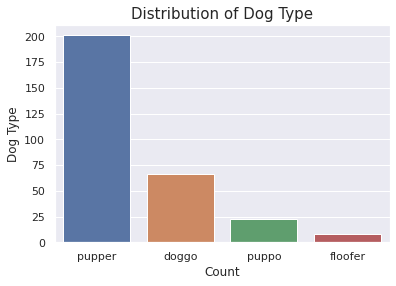

In [71]:
sorted_level = df.dog_type.value_counts().tail(-1).index
sns.set(style="darkgrid")
sns.countplot(data=df, x='dog_type', order=sorted_level, orient='h')
plt.xticks(rotation =360)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Dog Type', fontsize=12)
plt.title('Distribution of Dog Type', fontsize=15);

INSIGHTS: From the above graph, one can infer that the dog level called as 'pupper' (a small or young dog) is the most popular dog stage. It is followed by 'doggo' level and 'puppo' level but are significantly less. This can be attributed to the fact that people like dogs more when they are cute and really small/young. Although the visual gives us some idea about the situation, but due to lots of data missing, we cannot confirm this finding.

 
 
 
 


#### 2) Distribution of Source

Twitter for iphone    1932
Twitter Web Client    28  
TweetDeck             11  
Name: source, dtype: int64

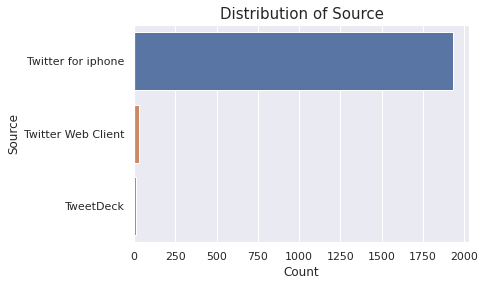

In [72]:
sort_source = df.source.value_counts().index
display(df.source.value_counts())

sns.set(style='darkgrid')
sns.countplot(data = df, y='source', order=sort_source)
plt.xticks(rotation =360)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Source', fontsize=12)
plt.title('Distribution of Source', fontsize=15);

INSIGHT:  From the above plot, we can tell that there is a single source among all the sources that is majority of the source which is 'Twitter for iPhone'.




#### 3) retweet_count and favorite_count

In [73]:
df.corr(method='pearson')

,tweet_id,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,Algo1_confidence,Algo2_confidence,Algo3_confidence,confidence
tweet_id,1.000000,0.024917,NaN,0.610744,0.383628,0.215396,0.104148,-0.001059,-0.046983,0.147300
rating_numerator,0.024917,1.000000,NaN,0.016763,0.019010,-0.003137,-0.006962,-0.019657,-0.004241,-0.022331
rating_denominator,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
favorite_count,0.610744,0.016763,NaN,1.000000,0.929146,0.130806,0.068919,-0.016163,-0.045812,0.071079
retweet_count,0.383628,0.019010,NaN,0.929146,1.000000,0.104828,0.046743,-0.014247,-0.038064,0.027185
img_num,0.215396,-0.003137,NaN,0.130806,0.104828,1.000000,0.202765,-0.156895,-0.137720,0.140527
Algo1_confidence,0.104148,-0.006962,NaN,0.068919,0.046743,0.202765,1.000000,-0.510649,-0.707916,0.624648
Algo2_confidence,-0.001059,-0.019657,NaN,-0.016163,-0.014247,-0.156895,-0.510649,1.000000,0.480698,-0.226620
Algo3_confidence,-0.046983,-0.004241,NaN,-0.045812,-0.038064,-0.137720,-0.707916,0.480698,1.000000,-0.383825
confidence,0.147300,-0.022331,NaN,0.071079,0.027185,0.140527,0.624648,-0.226620,-0.383825,1.000000


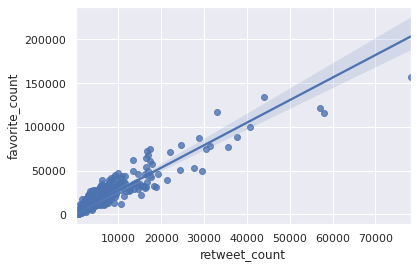

In [74]:
sns.regplot(x='retweet_count', y='favorite_count', data=df);

INSIGHT: A fair insight or let's say hypothesis can be stated as 'the more popular tweet gets more retweets' and which can be deduced to be true in general. Even the coorelation coefficient is 0.8 which indicates the same.


#### 4) Dog Classification results analysis


In [75]:
df.Algo1_pred.value_counts().head(10)

Golden_retriever      137
Labrador_retriever    94 
Pembroke              88 
Chihuahua             78 
Pug                   54 
Chow                  41 
Samoyed               40 
Pomeranian            38 
Toy_poodle            37 
Malamute              29 
Name: Algo1_pred, dtype: int64

Since there are lots of dog breeds, we decided to only pursue the 10 most predicted categories.

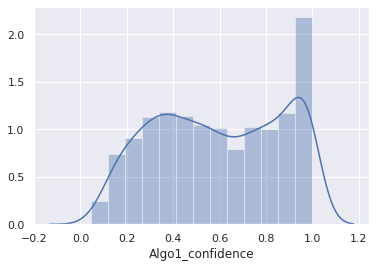

In [76]:
sns.set(style='darkgrid')
ax = sns.distplot(df.Algo1_confidence)

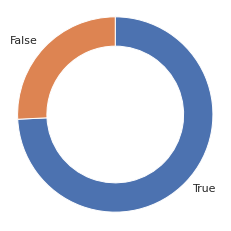

In [77]:
sort_p1 = df.Algo1_dog.value_counts()
plt.pie(sort_p1, labels=sort_p1.index, startangle=90, counterclock=False, wedgeprops={'width': 0.3})
plt.axis('square');

INSIGHT: The pie chart reveals that nearly in 2 out of 3 cases, the predictions are correct. The results are low considering a deep learning model. Also the confidence level for the algorithm is considerably high.